# Рекомендация тарифов

Представлены данные о поведении клиентов, которые уже перешли на эти тарифы. Цель: построить модель для задачи классификации, которая выберет подходящий тариф.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Откройте и изучите файл

In [79]:
df = pd.read_csv('/datasets/users_behavior.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## 2. Разбейте данные на выборки

In [80]:
df_learn, df_test = train_test_split(df, test_size=0.20, random_state=12345)

df_train, df_valid = train_test_split(df_learn, test_size=0.25, random_state=12345)


features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

print('train')
print(features_train.shape)
print(target_train.shape)
print()
print('valid')
print(features_valid.shape)
print(target_valid.shape)
print()
print('test')
print(features_test.shape)
print(target_test.shape)

train
(1928, 4)
(1928,)

valid
(643, 4)
(643,)

test
(643, 4)
(643,)


## 3. Исследуйте модели

 - Модель дерева решений

In [81]:

maxdepth = []
tDTpredictions = []
vDTpredictions = []

for n in range(1,10):
    
    model_DecisionTree = DecisionTreeClassifier(random_state=12345, max_depth=n)

    model_DecisionTree.fit(features_train, target_train) 

    valid_DecisionTree_predictions = model_DecisionTree.predict(features_valid)
    
    train_DecisionTree_predictions = model_DecisionTree.predict(features_train)
    
    maxdepth.append(n)
    tDTpredictions.append(accuracy_score(target_train, train_DecisionTree_predictions))
    vDTpredictions.append(accuracy_score(target_valid, valid_DecisionTree_predictions))
    
    print('max_depth =', n, 'Accuracy тренировочной выборки:', 
          accuracy_score(target_train, train_DecisionTree_predictions))
    
    print('max_depth =', n, 'Accuracy валидационной выборки:', 
          accuracy_score(target_valid, valid_DecisionTree_predictions))

max_depth = 1 Accuracy тренировочной выборки: 0.758298755186722
max_depth = 1 Accuracy валидационной выборки: 0.7387247278382582
max_depth = 2 Accuracy тренировочной выборки: 0.79201244813278
max_depth = 2 Accuracy валидационной выборки: 0.7573872472783826
max_depth = 3 Accuracy тренировочной выборки: 0.8117219917012448
max_depth = 3 Accuracy валидационной выборки: 0.7651632970451011
max_depth = 4 Accuracy тренировочной выборки: 0.8205394190871369
max_depth = 4 Accuracy валидационной выборки: 0.7636080870917574
max_depth = 5 Accuracy тренировочной выборки: 0.8272821576763485
max_depth = 5 Accuracy валидационной выборки: 0.7589424572317263
max_depth = 6 Accuracy тренировочной выборки: 0.8335062240663901
max_depth = 6 Accuracy валидационной выборки: 0.7573872472783826
max_depth = 7 Accuracy тренировочной выборки: 0.8506224066390041
max_depth = 7 Accuracy валидационной выборки: 0.7744945567651633
max_depth = 8 Accuracy тренировочной выборки: 0.8661825726141079
max_depth = 8 Accuracy валид

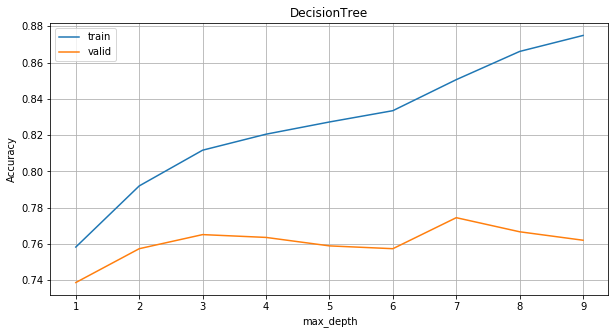

In [82]:
plt.figure(figsize = (10, 5))
plt.title('DecisionTree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(maxdepth, tDTpredictions, label = 'train')
plt.plot(maxdepth, vDTpredictions, label = 'valid')
plt.legend()
plt.show()

- Модель случайного леса

In [83]:

estimators = []
tRFpredictions = []
vRFpredictions = []

for estim in range(1,12,2):
    model_RandomForest = RandomForestClassifier(n_estimators=estim, random_state=12345, max_depth=10)
    
    model_RandomForest = model_RandomForest.fit(features_train, target_train)
    
    valid_RandomForest_predictions = model_RandomForest.predict(features_valid)
    
    train_RandomForest_predictions = model_RandomForest.predict(features_train)
    
    estimators.append(estim)
    tRFpredictions.append(accuracy_score(target_train, train_RandomForest_predictions))
    vRFpredictions.append(accuracy_score(target_valid, valid_RandomForest_predictions))
    
    print("Accuracy при estim", estim, ":")
    print("Тренировочная выборка:", accuracy_score(target_train, train_RandomForest_predictions))
    print("Валидационная выборка:", accuracy_score(target_valid, valid_RandomForest_predictions))

Accuracy при estim 1 :
Тренировочная выборка: 0.8630705394190872
Валидационная выборка: 0.76049766718507
Accuracy при estim 3 :
Тренировочная выборка: 0.8801867219917012
Валидационная выборка: 0.7869362363919129
Accuracy при estim 5 :
Тренировочная выборка: 0.8801867219917012
Валидационная выборка: 0.7962674961119751
Accuracy при estim 7 :
Тренировочная выборка: 0.8910788381742739
Валидационная выборка: 0.7947122861586314
Accuracy при estim 9 :
Тренировочная выборка: 0.8874481327800829
Валидационная выборка: 0.7962674961119751
Accuracy при estim 11 :
Тренировочная выборка: 0.8900414937759336
Валидационная выборка: 0.7900466562986003


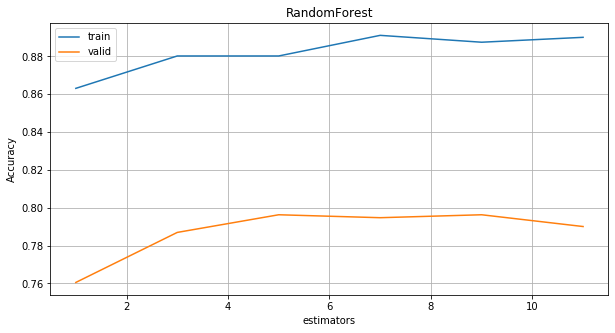

In [84]:
plt.figure(figsize = (10, 5))
plt.title('RandomForest')
plt.xlabel('estimators')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(estimators, tRFpredictions, label = 'train')
plt.plot(estimators, vRFpredictions, label = 'valid')
plt.legend()
plt.show()

 - Модель логистической регрессии

In [85]:
model_LogisticRegression = LogisticRegression(random_state=12345)

model_LogisticRegression.fit(features_train, target_train)

print(model_LogisticRegression.score(features_train, target_train))
print(model_LogisticRegression.score(features_valid, target_valid))

0.703838174273859
0.6967340590979783


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Выводы: 

1)Для Модели дерева решений влияние проблемы переобучения тем сильнее, чем больше параметр max_depth; для Модели случайного леса это утверждение также верно, влияние параметра n_estimators гораздо слабее; Модель логистической регрессии менее всего подвержена проблеме переобучения.

2)Модель RandomForestClassifier показала наиболее качественные показатели на валидационной выборке. Наиболее желательные значения из рассматриваемых гиперпараметров: n_estimators=5 и max_depth=10.
Модель при этих гиперпараметрах даёт accuracy почти 0,8. Очевидно успешность этой модели обеспечено гибкостью алгоритма её обучения, т.е. возможностью настройки бОльшим количеством гиперпараметров, кроме того небольшим (относительно) объёмом датасета. 

## 4. Проверьте модель на тестовой выборке

In [86]:
model_RandomForest = RandomForestClassifier(n_estimators=5, random_state=12345, max_depth=10)
    
model_RandomForest = model_RandomForest.fit(features_train, target_train)

train_predictions = model_RandomForest.predict(features_train)

print("Тренировочная выборка:", accuracy_score(target_train, train_predictions))

test_predictions = model_RandomForest.predict(features_test)
    
print("Тестовая выборка:", accuracy_score(target_test, test_predictions))

Тренировочная выборка: 0.8801867219917012
Тестовая выборка: 0.7853810264385692
